# One Class Support Vector Machines

## Importing Libraries

In [1]:
# Data Processing
import numpy as np
import pandas as pd
from collections import Counter

# Importing tde
import tde

import matplotlib.pyplot as plt

# Model and Performance
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import OneClassSVM
from sklearn.metrics import classification_report #for model performance evaluation

# To generate the for loops
import glob
import os
from matplotlib import ticker

## Data Management

In [2]:
# READ INFECTION TIME DATA
infection_data = pd.read_excel('/Users/yoddmena/Downloads/Research/Telemetry_edited/MRSA - Master sheet.xlsx', index_col=0)

# READ AND EXTRACT DATA FROM FOLDER CONTAINING EXCEL SHEETS
folder = "/Users/yoddmena/Downloads/Research/Telemetry_edited/"
files = glob.glob( folder + "Ex *.xlsx" ) 

In [3]:
# CREATE A LIST OF TEMPERATURES
temp = []

for file in files:
    df = pd.read_excel(file)
    file_temp = df.iloc[:, 3::2]  # slicing the data for only temperature
    
    # Ensure that the number of minutes matches the number of temperature columns
    num_temp_columns = file_temp.shape[1]
    
    # Iterate over every other column in file_temp
    for j in range(0, num_temp_columns):
        # Extract the specific temperature column and its corresponding minutes
        column_name = file_temp.columns[j]
        temperature = file_temp[column_name]
        
        # Append the temperature and minutes to each lists
        temp.append(temperature)

## Creating Data Frames

In [4]:
##### INFECTION DATA
infection_data = infection_data.iloc[:,[1,9]]
infection_data = infection_data.T # transpose the data

infection_data.columns = infection_data.iloc[0] # Assign the values of the first row as the new column names

infection_data = infection_data[1:] # Remove the first row (previous column names)


##### TEMPERATURE DATA
df_temp = pd.DataFrame(temp)
df_temp = df_temp.T # transpose the data

df_temp.columns = df_temp.columns.astype(str).str.split(' ').str[0] # Rename columns keeping only the first word


In [5]:
df_temp

,CC006-315,CC006-316,CC006-317,CC019-1392,CC019-1393,CC043-455,CC043-456,CC043-457,CC051-489,CC051-490,...,CC024-371,CC027-400,CC027-401,CC027-403,CC041-1752,CC041-1753,CC041-1754,CC041-1758,CC041-1759,CC041-1760
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,36.21,36.37,37.14,36.29,36.77,35.38,35.58,35.78,36.46,36.43,...,36.85,36.22,36.27,37.04,36.12,35.92,36.23,36.61,36.48,36.44
3,36.33,36.60,37.20,36.35,36.91,35.40,35.58,35.76,36.54,36.48,...,36.87,36.37,36.37,37.06,36.20,35.99,36.31,36.68,36.61,36.57
4,36.47,36.73,37.12,36.40,37.01,35.41,35.72,35.73,36.61,36.56,...,36.95,36.49,36.56,37.07,36.28,36.11,36.45,36.82,36.77,36.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24622,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Scores

In [6]:
# IMPORTING THE SVM MODEL
# this model is from SckiKit Learn
model = svm.OneClassSVM()

# SIGMOID DEFINITION
# we will use the sigmoid function to make our scores be a numerical value that lies between 0 and 1

beta = (2/700) # 700 is the largest value
def sigmoid(scores, beta):
    return 1 / (1 + np.exp(-beta * scores))

Found 'CC006-315' and its infection value is '10300'
Minimum Score:  267.52007264767286
After Training Min:  11043
After Infection Min:  11043
First anomaly found after training: 6723 minutes with score 267.4976407369712
First anomaly found after infection: 743 minutes with score 267.4976407369712
Found 'CC006-316' and its infection value is '10300'
Minimum Score:  274.82851288077353
After Training Min:  6949
After Infection Min:  10462
First anomaly found after training: 2629 minutes with score 271.684894294429
First anomaly found after infection: 162 minutes with score 268.1715669032109
Found 'CC006-317' and its infection value is '10300'
Minimum Score:  293.83288135042164
After Training Min:  6702
After Infection Min:  12666
First anomaly found after training: 2382 minutes with score 271.149233897299
First anomaly found after infection: 2366 minutes with score 263.58820191686965
Found 'CC019-1392' and its infection value is '10300'
Minimum Score:  212.29037014244363
After Training M

Found 'CC001-366' and its infection value is '10250'
Minimum Score:  228.22563959151606
After Training Min:  5267
After Infection Min:  12382
First anomaly found after training: 947 minutes with score 210.6300858538827
First anomaly found after infection: 2132 minutes with score 214.56811397150102
Found 'CC003-225' and its infection value is '10250'
Minimum Score:  232.67180713933914
After Training Min:  10997
After Infection Min:  10997
First anomaly found after training: 6677 minutes with score 203.1991567801985
First anomaly found after infection: 747 minutes with score 203.1991567801985
Found 'CC017-455' and its infection value is '10250'
Minimum Score:  195.0703291824148
After Training Min:  5526
After Infection Min:  10398
First anomaly found after training: 1206 minutes with score 191.05782289532164
First anomaly found after infection: 148 minutes with score 182.76450851669108
Found 'CC017-456' and its infection value is '10250'
Minimum Score:  143.37348760594693
After Training 

Found 'B6-117' and its infection value is '10500'
Minimum Score:  218.92888334683278
After Training Min:  10524
After Infection Min:  10524
First anomaly found after training: 6204 minutes with score 162.94256610866717
First anomaly found after infection: 24 minutes with score 162.94256610866717
Found 'CC001-304' and its infection value is '11300'
Minimum Score:  224.9223073361121
After Training Min:  6825
After Infection Min:  12999
First anomaly found after training: 2505 minutes with score 221.02225408544234
First anomaly found after infection: 1699 minutes with score 219.64568137419067
No match found for mouse 'CC001-306'
Minimum Score:  297.3829145117937
After Training Min:  5246
After Infection Min:  11300
First anomaly found after training: 926 minutes with score 296.8309070298099
First anomaly found after infection: 0 minutes with score 143.12071081374768
Found 'CC013-671' and its infection value is '11300'
Minimum Score:  255.64158590802242
After Training Min:  7568
After Infe

Found 'CC058-298' and its infection value is '11500'
Minimum Score:  208.85905075132496
After Training Min:  7597
After Infection Min:  11899
First anomaly found after training: 3277 minutes with score 202.3586974098357
First anomaly found after infection: 399 minutes with score 206.78358281447845
No match found for mouse 'CC061-542'
Minimum Score:  151.3005505034415
After Training Min:  720
After Infection Min:  11500
First anomaly found after training: -3600 minutes with score 162.68526933239195
First anomaly found after infection: 0 minutes with score 557.0363989030822
Found 'CC061-543' and its infection value is '11500'
Minimum Score:  213.67137747142118
After Training Min:  5248
After Infection Min:  11823
First anomaly found after training: 928 minutes with score 213.24464973074137
First anomaly found after infection: 323 minutes with score 198.6669074812878
Found 'CC061-544' and its infection value is '11500'
Minimum Score:  225.5969400841295
After Training Min:  6493
After Infe

Found 'CC012-1359' and its infection value is '10250'
Minimum Score:  219.3294134486435
After Training Min:  5486
After Infection Min:  12852
First anomaly found after training: 1166 minutes with score 214.8162593659914
First anomaly found after infection: 2602 minutes with score 217.87014896319081
Found 'CC025-620' and its infection value is '10250'
Minimum Score:  304.0499681068896
After Training Min:  5600
After Infection Min:  13883
First anomaly found after training: 1280 minutes with score 304.04947067251356
First anomaly found after infection: 3633 minutes with score 293.903121854565
Found 'CC037-488' and its infection value is '10250'
Minimum Score:  354.6648289702027
After Training Min:  5510
After Infection Min:  11137
First anomaly found after training: 1190 minutes with score 354.0904205893995
First anomaly found after infection: 887 minutes with score 352.76745357498777
Found 'CC037-489' and its infection value is '10250'
Minimum Score:  282.87118421468955
After Training M

Found 'CC058-319' and its infection value is '10500'
Minimum Score:  201.8908846467724
After Training Min:  7169
After Infection Min:  11443
First anomaly found after training: 2849 minutes with score 200.6196615621127
First anomaly found after infection: 943 minutes with score 198.35733463073797
Found 'CC061-565' and its infection value is '10500'
Minimum Score:  226.52964992160938
After Training Min:  8882
After Infection Min:  10828
First anomaly found after training: 4562 minutes with score 214.62500807648735
First anomaly found after infection: 328 minutes with score 225.08961150725193
Found 'CC001-325' and its infection value is '10100'
Minimum Score:  209.61900986923695
After Training Min:  6910
After Infection Min:  10377
First anomaly found after training: 2590 minutes with score 167.59816367499866
First anomaly found after infection: 277 minutes with score 200.11370458839747
Found 'CC025-645' and its infection value is '10100'
Minimum Score:  246.40440991049502
After Training

Found 'CC041-1758' and its infection value is '10200'
Minimum Score:  298.9860420883054
After Training Min:  5512
After Infection Min:  10201
First anomaly found after training: 1192 minutes with score 294.24541309892317
First anomaly found after infection: 1 minutes with score 296.802123382467
Found 'CC041-1759' and its infection value is '10200'
Minimum Score:  270.92274931284965
After Training Min:  5818
After Infection Min:  10200
First anomaly found after training: 1498 minutes with score 268.24201969786014
First anomaly found after infection: 0 minutes with score 227.25605163377156
Found 'CC041-1760' and its infection value is '10200'
Minimum Score:  157.30237871166264
After Training Min:  9501
After Infection Min:  11162
First anomaly found after training: 5181 minutes with score 156.47545504162144
First anomaly found after infection: 962 minutes with score 152.58598268049604


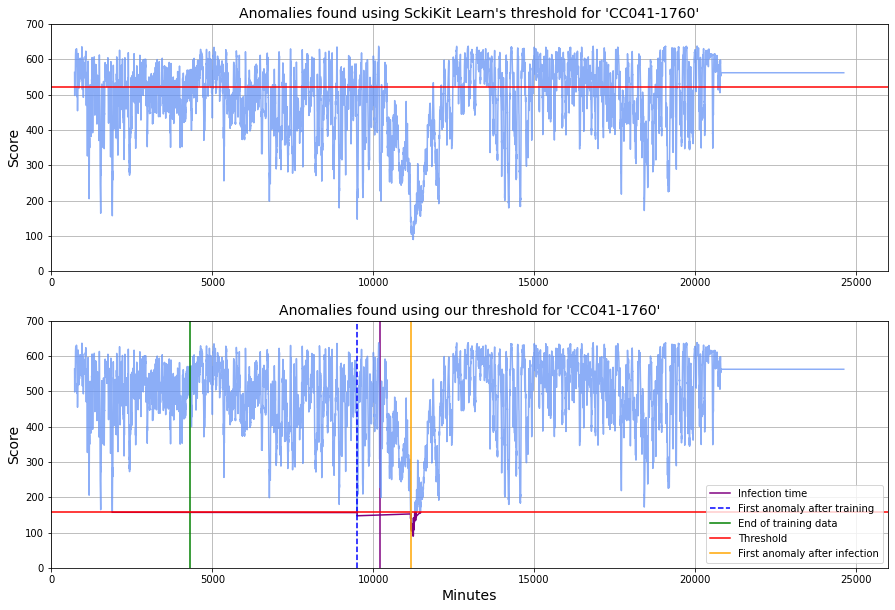

In [198]:
fig,ax = plt.subplots(2,1,figsize=(15,10), sharex = False)
fig.set_facecolor("white")

train_end = 4320
shift = 2*360 # since the period is 6 hours (360) and we do this twice

start_idx = 2
end_idx = 5

# LISTS
# First anomalies after infection
min_scores = []
first_anom_train = []
first_anom_inf = []
score_train = []
score_infec = []

for i in range(0, df_temp.shape[1]): #df_temp.shape[1]
    ax[0].cla()  # clear axis 0-1
    ax[1].cla()
    
    #mice_min = range(0, df_temp.shape[0]) # Get the specific minutes for the current temperature time series
    
    temp_value = df_temp.iloc[:, i] # extract the temperature values for the current column
    mice_temp = df_temp.iloc[:, i].to_frame() # converting temp list to data frame
    
    names = mice_temp.columns[0] # get the column name for the current file
    
    # Filing in missing data
    temp_value_fw = temp_value.fillna(method='ffill') # foward fill
    temp_value_bw = temp_value_fw.fillna(method='bfill') # backward fill after forward fill
    
    # Time Delay Embedding
    temp_tde = tde.tde(temp_value_bw) # using the tde file
    temp_tde = temp_tde.T # transporting the data
    
    ##################################################################
    # Fit the Data on the first 3 days (3*24*60) 
    model.fit(temp_tde[:4321,:])
    
    # Predict the Data
    predict_train_data = model.predict(temp_tde[:4321,:]) # predict on training data
    predict_test_data = model.predict(temp_tde[4321:,:]) # predicting on test data
    
    # Scores
    scores_train_data = model.score_samples(temp_tde[:4321,:]) # scores on training data 
    scores_test_data = model.score_samples(temp_tde[4321:,:]) # scores on test data
    
    #SckiKit Learn's Threshold
    threshold = model.offset_
    
    ##################################################################
    # Combine training and testing scores and predictions
    combined_scores= np.concatenate((scores_train_data, scores_test_data), axis=0)
    combined_predictions = np.concatenate((predict_train_data, predict_test_data), axis=0)
    
    time = np.arange(temp_tde.shape[0])+(shift) # 2 times the time delay shift
    
    # Minimum score
    min_score = scores_train_data.min()
    
    # Find the indices of the anomalies
    anomaly_indices = np.where(combined_scores <= min_score)[0] #finding the values where its -1 (anomaly)
    time_2 = anomaly_indices + (shift) # shifting the time for plotting
    
    ##################################################################
    # Plotting 1st Graph
    ax[0].plot(time, combined_scores, '-', color='#6693F5', alpha=0.75)  # Plot the scores with blue color #[:100]
    ax[0].grid()
    ax[0].set_ylabel("Score", fontsize=14)
    ax[0].set_title(f"Anomalies found using SckiKit Learn's threshold for '{names}'", fontsize=14)
    ax[0].set_xlim(-10,26000)
    ax[0].set_ylim(0,700)
    ax[0].axhline(y = threshold, color='red', linestyle='-', label='threshold')
    # Plot the anomalies with red color
    #ax[0].plot(time_2, combined_scores[anomaly_indices], '', color='purple') #[:100]
    #ax[0].axhline(y=min_score, color='red', linestyle='-')

    ##################################################################
    # Plotting infection time
    matching_columns = set(mice_temp.columns).intersection(infection_data.columns)
    
    if matching_columns:
        column_name = matching_columns.pop()
        infection_time = infection_data.loc['Aprprox Infection Minute', column_name]
        # Add a vertical line at the infection time
        ax[1].axvline(x = infection_time, color='purple', linestyle='-', label='Infection time')
        print(f"Found '{column_name}' and its infection value is '{infection_time}'")
    else:
        print(f"No match found for mouse '{names}'")
    
    ##################################################################
    # Find the index at which the first score is less than min_score
    boolean = combined_scores < min_score
    anom_train = np.argmax(boolean) #+shift
    anom_infec = np.argmax(boolean[infection_time-shift:]) + infection_time 
    
    # Get the corresponding value
    value = combined_scores[anom_train]
    value_1 = combined_scores[anom_infec-shift]
    
    # Calculating the time first anomaly was found after training and infection
    time_aft_train = (anom_train + shift) - train_end
    time_aft_infection = anom_infec - infection_time
    
    # Calculating the amount of false negatives (between end of train and infection time)
    count_false_neg = np.count_nonzero(boolean[train_end:infection_time])
    
    # Calculating the amount of true positives (infection time)
    count_true_pos = np.count_nonzero(boolean[infection_time:]) 
    
    # Calculating true positive rate
    TPR = count_true_pos / (count_true_pos + count_false_neg)
    
    ##################################################################
    # Plotting 2nd Graph
    ax[1].plot(time, combined_scores, '-', color='#6693F5', alpha=0.75)  # Plot the scores with blue color #[:100]
    ax[1].plot(time_2, combined_scores[anomaly_indices], '', color='purple') #coloring anomalies
    ax[1].grid()
    ax[1].set_ylabel("Score", fontsize=14)
    ax[1].set_xlabel("Minutes", fontsize=14)
    ax[1].set_title(f"Anomalies found using our threshold for '{names}'", fontsize=14)
    #ax[1].set_xlim(infection_time-5,infection_time+30)
    ax[1].set_xlim(-10,26000)
    ax[1].set_ylim(0,700)
    
    ##################################################################
    # Plotting Horizontal and Vertical Lines
    ax[1].axvline(x = anom_train+shift, color='blue', linestyle='--', label='First anomaly after training') # when the first value is less the minimum value
    ax[1].axvline(x = train_end, color='green', linestyle='-', label='End of training data')
    ax[1].axhline(y=min_score, color='red', linestyle='-', label='Threshold')
    ax[1].axvline(x = anom_infec, color='orange', linestyle ='-', label='First anomaly after infection')
    #ax[1].axhline(y=value, color='blue', linestyle='--', label='value')
    #ax[1].axhline(y=value_1, color='orange', linestyle='-', label='value_1')
    ax[1].legend()
    
    ##################################################################
    # Print Values
    print("Minimum Score: ", min_score)
    print("After Training Min: ", anom_train+shift)
    print("After Infection Min: ", anom_infec)
    print(f"First anomaly found after training: {time_aft_train} minutes with score {value}")
    print(f"First anomaly found after infection: {time_aft_infection} minutes with score {value_1}")
    print(f"True Positve Rate: {round(TPR*100,2)}%")
    
    ##################################################################
    # Save each plot
    filename = "Anomalies/%s_anomaly.png" % names  # saving the file as the name of the mouse
    fig.savefig(filename)
    
    ##################################################################
    # Appending to Lists
    min_scores.append(min_score)
    first_anom_train.append(time_aft_train)
    first_anom_inf.append(time_aft_infection)
    score_train.append(value)
    score_infec.append(value_1)
    

In [ ]:
# Make all lists into arrays
ms = np.array(min_scores)
fat = np.array(first_anom_train)
fai = np.array(first_anom_inf)
st = np.array(score_train)
si = np.array(score_infec)

In [ ]:
# Create the data for the table (calculates statistics)
data = {
    'column_1': [round(np.mean(ms),2), round(np.mean(fat),2), round(np.mean(fai),2), round(np.mean(st),2), round(np.mean(si),2)],
    'column_2': [round(np.std(ms),2), round(np.std(fat),2), round(np.std(fai),2), round(np.std(st),2), round(np.std(si),2)],
    'column_3': [round(np.percentile(ms, 25),2), round(np.percentile(fat, 25),2), round(np.percentile(fai, 25),2), round(np.percentile(st, 25),2), round(np.percentile(si, 25),2)],
    'column_4': [round(np.percentile(ms, 50),2), round(np.percentile(fat, 50),2), round(np.percentile(fai, 50),2), round(np.percentile(st, 50),2), round(np.percentile(si, 50),2)],
    'column_5': [round(np.percentile(ms, 75),2), round(np.percentile(fat, 75),2), round(np.percentile(fai, 75),2), round(np.percentile(st, 75),2), round(np.percentile(si, 75),2)],
}

In [ ]:
# Create a DataFrame
df = pd.DataFrame(data)

# Set row names (index)
row_names = ['Minimum Score   ', 'First Anomaly Time After Training   ', 'First Anomaly Time After Infection   ', 'First Anomaly Score After Training   ', 'First Anomaly Score After Infection   ']
df.index = row_names

# Set column names
column_names = ['Mean', 'Standard Deviation', 'Quartile 1 (25%)', 'Quartile 2 (Med)', 'Quartile 3 (75%)']
df.columns = column_names

In [ ]:
# Saving the Table
# Create a table visualization using matplotlib
fig, ax = plt.subplots(figsize=(6, 4))
ax.axis('off')
table = ax.table(cellText=df, colLabels=df.columns, rowLabels=df.index, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(14)
table.scale(2.5, 2)  # Adjust the scaling factor as per your requirements

# Modify the column names as dark color boxes
for i, col_name in enumerate(df.columns):
    cell = table[0, i]
    cell.set_text_props(weight='bold', color='white')
    cell.set_facecolor('darkgray')
    
# Save the table as an image file
plt.savefig('table_statistics.png', bbox_inches='tight', facecolor='white')
